# Timing

### Static Single Asset Example


We model preferences using **mean-variance utility**

Consider a **mean-variance investor** allocating between a factor (the market) and a risk-free asset.

The investor solves:

$$\max_{w} E[w r_{t+1} + (1-w)r^f] - \frac{\gamma}{2} Var(w r_{t+1} + (1-w)r^f)$$

where:
- $w$ = weight on the risky portfolio 
- $r_{t+1}$ = risky asset return 
   - Not known at date t. it is a random variable: $E[r_{t+1}]\neq r_{t+1}$
- $r^f$ = risk-free rate from t to t+1 
- known at date t: $E[r^f]= r^f$
- $\gamma$ = risk aversion coefficient
- $\text{E}(x)$ =  Expectation of random variable x
- $\text{Var}(x)$ =  variance of random variable x


The solution is elegantly simple:

> 💡 **Key Insight**: At the optimal, the slope of your objective cannot change with the weight

$$(E[r_{t+1}]-r^f) - \gamma w Var(r_{t+1})=0$$

> 💡 **Key Insight**: The optimal allocation formula
> 
> $$w^* = \frac{E[r_{t+1} - r^f]}{\gamma \cdot Var(r_{t+1})}$$
>
> You invest proportionally to the **risk-return trade-off**:
> - 📈 **Lever up** when expected returns are higher
> - 📉 **Lever down** when variance is higher



### 📈 Sharpe Ratio Targeting

A beautiful result emerges: you **target portfolio volatility** to move with the asset Sharpe ratio:

$$w^* \cdot \sqrt{Var(r_{t+1})} = \frac{1}{\gamma} \cdot \frac{E[r_{t+1}] - r^f_{t+1}}{\sqrt{Var(r_{t+1})}} = \frac{1}{\gamma} \cdot SR(r_{t+1})$$

> 💡 **Key Insight**: When the Sharpe ratio is high, you choose a **more volatile portfolio**. 
> 
> Note that $|w^*| \cdot \sqrt{Var(r_{t+1})}$ is the portfolio volatility
>
> If SR<0 you still have a postive volatility portfolio--you just short the asset instead of going long! 
>
> This makes sense—it's more attractive to take risk when you're better compensated for it!

**The practical implications**:

| Scenario | Action |
|----------|--------|
| Risk premium ↑ more than variance | **Lever up** |
| Variance ↑ more than risk premium | **Lever down** |

The theory tells us it's all about the **ratio of premium to variance**.

> **🤔 Stop and Think:** What if I don't care about variance?

- what you would do if there are no leverage limits?
- What if you can't borrow?
- What if you can borrow but your leverage depends on your portfolio vol?
- What if it does not depend on it?

### Single asset with time-varying moments

Same problem but now expected returns, risk-free, and variance move around over time

$$\max_{w_t} E_t[w_t r_{t+1} + (1-w)r^f_{t+1}] - \frac{\gamma}{2} Var_t(w_t r_{t+1} + (1-w)r^f_{t+1})$$


where:
- $w_t$ = weight on the risky portfolio at date t
- $r_{t+1}$ = risky asset return from t to t+1 
   - Not known at date t. it is a random variable: $E_t[r_{t+1}]\neq r_{t+1}$
- $r^f_{t+1}$ = risk-free rate from t to t+1 (known at date t. )
- known at date t: $E[r^f_{t+1}]= r^f_{t+1}$
- $E_t(x)$ =  Expectation of random variable x at date t given all I know
- $Var_t(x)$ = E_t[(x-E_t[x])^2] variance of random variable x around what I expect the vriable to be given all I know

This can be simplified to:

$$\max_{w} rf_{t+1}+w_tE_t[r^e_{t+1}] - \frac{\gamma}{2} w_t^2Var_t(r^e_{t+1})$$

> Do you understand why this follows?

- We get the same result!

$$w^*_t = \frac{E_t[r^e_{t+1}]}{\gamma \cdot Var_t(r^e_{t+1})}$$

- The volatility of you portfolio should track the Sharpe ratio of the portfolio over time
- What is the intuition?

$$w^* \cdot \sqrt{Var_t(r^e_{t+1})} = \frac{1}{\gamma} \cdot SR_t(r^e_{t+1})$$

- Note that given the behavior of excess returns, variation in the risk-free rate does not matter at all



### ⚠️ Caution: The risk-free rate
> - Is $Var(r_{t+1})=Var(r^e_{t+1})$? 
> - If I compute both in the data, will they be the same?
> - Should it matter if the risk-free is constant or time-varying?
> - If it moves around does it mean it is risky?
> - What is the correct one to use? 

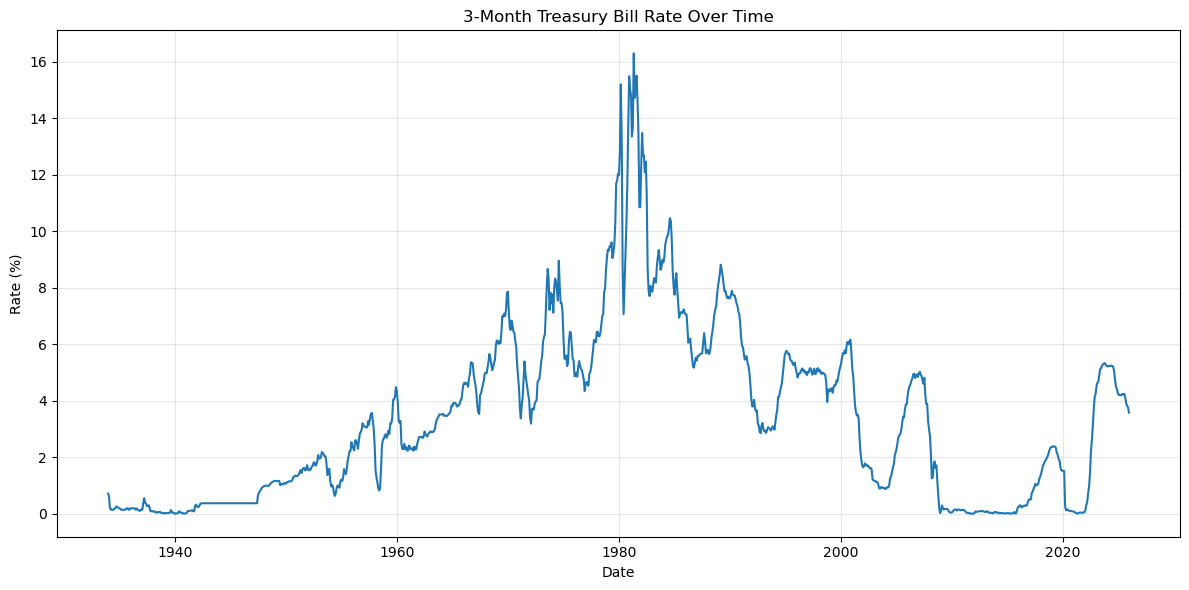

The variance of the 3-month Treasury Bill rate is: 9.583294505022533


In [4]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Import 3-month Treasury Bill rate from FRED (entire time series)
tbill_3m = pdr.data.DataReader('TB3MS', 'fred', start='1934-01-01')

# Plot the 3-month T-Bill rate over time
plt.figure(figsize=(12, 6))
plt.plot(tbill_3m.index, tbill_3m['TB3MS'])
plt.title('3-Month Treasury Bill Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f'The variance of the 3-month Treasury Bill rate is: {tbill_3m['TB3MS'].var()}')

## 📌 Key Takeaways

Before diving into implementation, remember these core principles:

1. **Time-varying moments create opportunity**: If expected returns and volatility change over time, you can exploit this through dynamic allocation

2. **The optimal allocation is intuitive**: Invest proportionally to expected excess return, inversely to variance and risk aversion

3. **Target the Sharpe ratio**: Adjust portfolio volatility based on how attractive the risk-return trade-off is

4. **Think carefully about what you do**: What you do in the data needs to be guided by an economic understanding

---

**In the following notebooks, we'll explore two practical approaches:**
- **Expected Returns Timing**: Predicting when market returns will be high or low
- **Volatility Timing**: Adjusting exposure based on time-varying risk